# Part 2: Data Preprocessing: Technical Analysis
**_TABLE OF CONTENT_**
    1. Data Exploration
    2. Inspect missing values
    3. Inspect Data quality and outliers
    4. Calculate Features
    5. Calculate correlations
        5.1 Correlation between independent variables
        5.2 Correlation with dependent variable


In [1]:
# Standard imports
import gc
from datetime import timedelta, date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import helpfunctions from preprocessing script
from matplotlib import gridspec
from preprocessing import *

# Visual settings for notebook
pd.options.display.max_columns = None
from IPython.core.display import display
from pandas.core.dtypes.common import is_numeric_dtype
plt.style.reload_library()
plt.style.use(['science','no-latex', 'high-contrast'])
sns.set_context("paper")
sns.set_style("whitegrid")

## 1. Data Exploration
### Retrieve the table with technical analysis indicators

In [2]:
# Function from preprocessing script to retrieve table from db
techn_df = get_technical_table()
techn_df['date'] = pd.to_datetime(techn_df.date)
# Show number of rows and columns
print(techn_df.shape)

# Show first 5 observations
techn_df.head()


(4743, 8)


,ticker,date,open,close,high,low,adjclose,volume
0,AAPL,2020-02-19,80.000000,80.904999,81.0,80.000000,80.282684,93984000
1,AAPL,2020-02-20,80.657501,80.074997,81.0,79.552498,79.459068,100566000
2,AAPL,2020-02-24,74.315002,74.544998,76.0,72.307503,73.971603,222195200
3,AAPL,2020-02-25,75.237503,72.019997,75.0,71.532501,71.466019,230673600
4,AAPL,2020-02-26,71.632500,73.162498,74.0,71.625000,72.599739,198054800


##### 1. _AAPL_

<ipython-input-7-630c1d0d403b>:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  techn_df[techn_df['ticker'] == tck][clmns].hist(ax=ax, bins = 20, color='k')


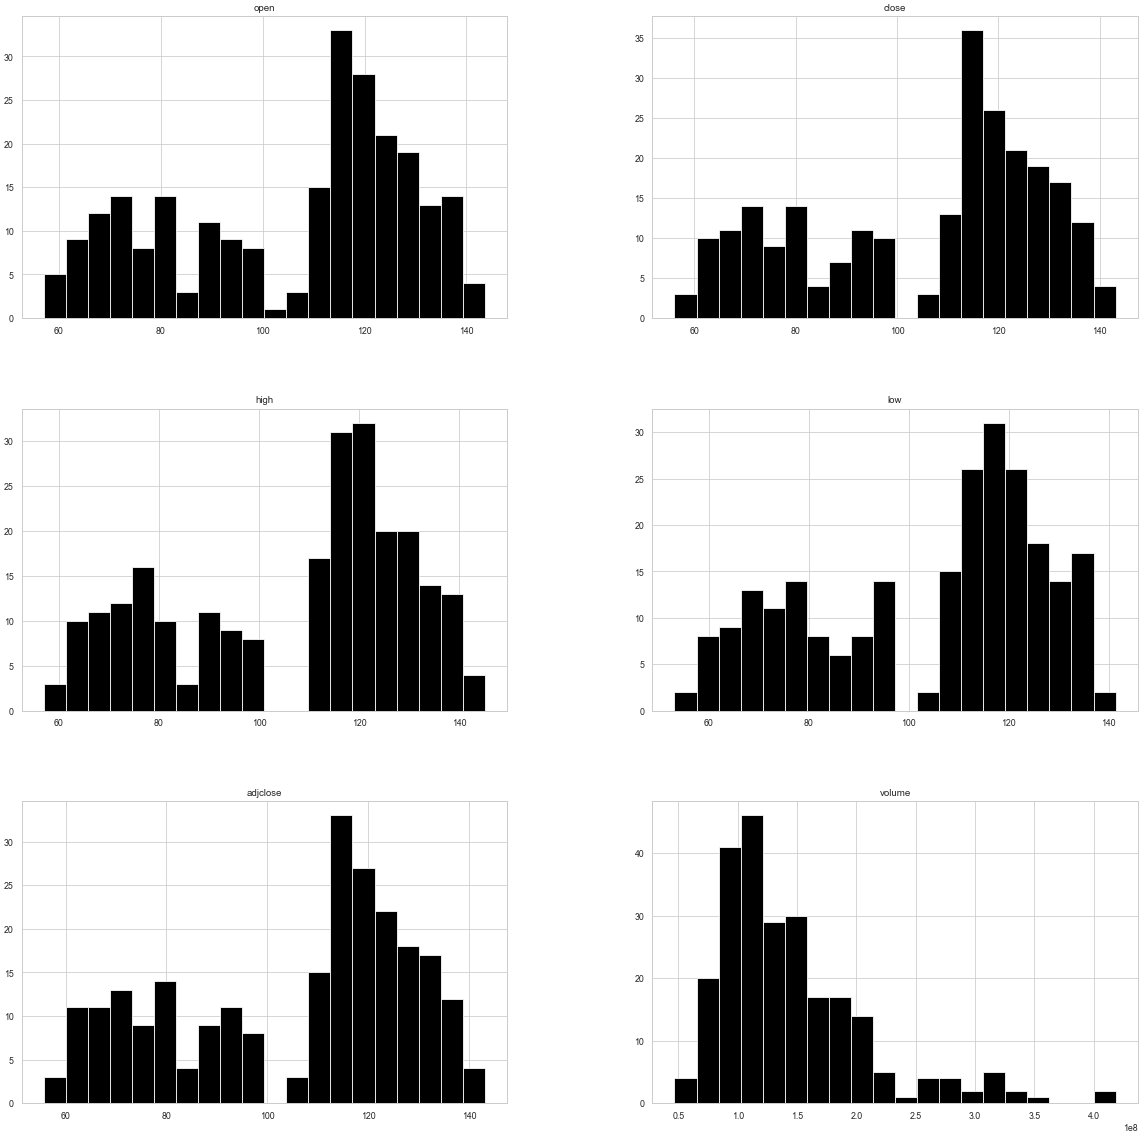

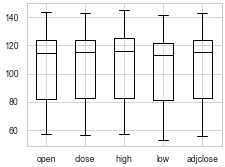

,open,close,high,low,adjclose,volume
count,244.000,244.000,244.000,244.000,244.000,2.440000e+02
mean,105.651,105.597,106.845,104.073,105.355,1.451820e+08
std,23.724,23.541,23.929,23.315,23.730,6.435672e+07
min,57.020,56.092,57.000,53.153,55.661,4.669130e+07
25%,82.213,82.844,82.500,81.516,82.429,1.008355e+08
50%,114.670,114.990,116.060,113.215,114.965,1.270168e+08
75%,123.833,123.480,125.000,121.525,123.480,1.689032e+08
max,143.600,143.160,145.080,141.370,143.160,4.184740e+08


In [7]:
tck= 'AAPL'
# Select all columns except for date and ticker to be shown in histograms
clmns = techn_df.columns.drop(['date', 'ticker'])

# Set for subplots
fig, ax = plt.subplots(figsize = (20,20))

# Create histogram for all columns
techn_df[techn_df['ticker'] == tck][clmns].hist(ax=ax, bins = 20, color='k')
plt.show()

# Create boxplot
techn_df[techn_df['ticker'] == tck][['open', 'close', 'high', 'low', 'adjclose']].boxplot(color='k')
plt.show()
# Show summary for all columns
display(techn_df[techn_df['ticker'] == tck].describe().round(3))

##### 2. _AMZN_

<ipython-input-9-f8cf8ce6ecbc>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  techn_df[techn_df['ticker'] == tck][clmns].hist(ax=ax, bins = 20)


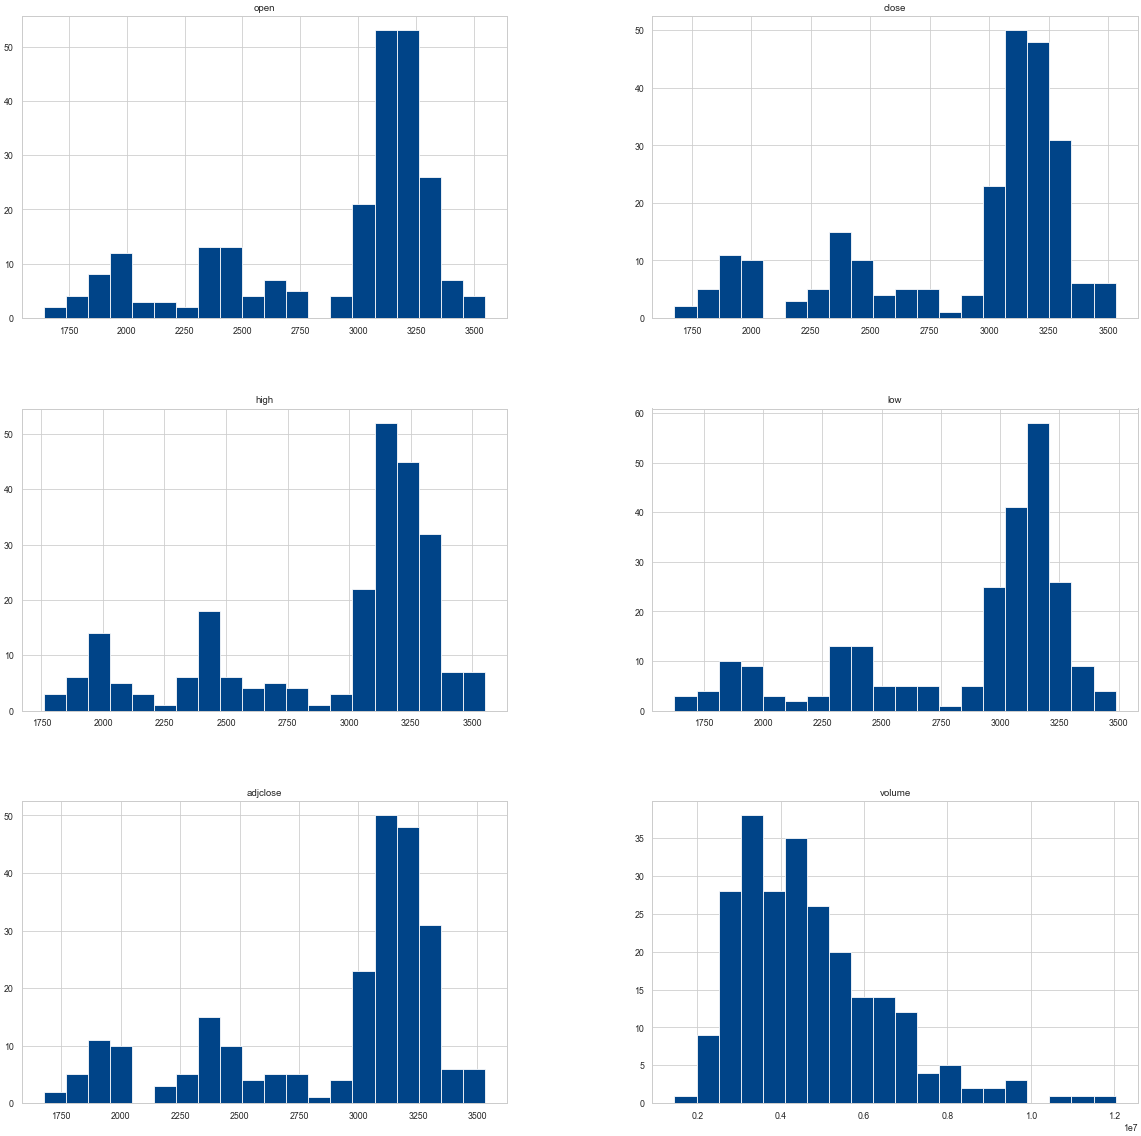

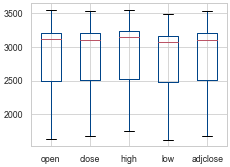

,open,close,high,low,adjclose,volume
count,244.000,244.000,244.000,244.000,244.000,2.440000e+02
mean,2892.347,2892.391,2931.421,2851.943,2892.391,4.702935e+06
std,472.638,467.503,471.415,466.604,467.503,1.774056e+06
min,1641.510,1676.610,1759.000,1626.030,1676.610,1.451900e+06
25%,2500.150,2517.530,2528.750,2482.323,2517.530,3.329250e+06
50%,3116.345,3107.870,3143.850,3075.075,3107.870,4.328250e+06
75%,3205.115,3203.747,3241.213,3165.153,3203.747,5.653750e+06
max,3547.000,3531.450,3552.000,3486.690,3531.450,1.203820e+07


In [9]:
tck= 'AMZN'
# Set for subplots
fig, ax = plt.subplots(figsize = (20,20))
# Create histogram for all columns
techn_df[techn_df['ticker'] == tck][clmns].hist(ax=ax, bins = 20)
plt.show()
# Create boxplot
techn_df[techn_df['ticker'] == tck][['open', 'close', 'high', 'low', 'adjclose']].boxplot()
plt.show()
# Show summary for all columns
display(techn_df[techn_df['ticker'] == tck].describe().round(3))

##### 3. _GOOG_

<ipython-input-11-23f53a2a32ff>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  techn_df[techn_df['ticker'] == tck][clmns].hist(ax=ax, bins = 20)


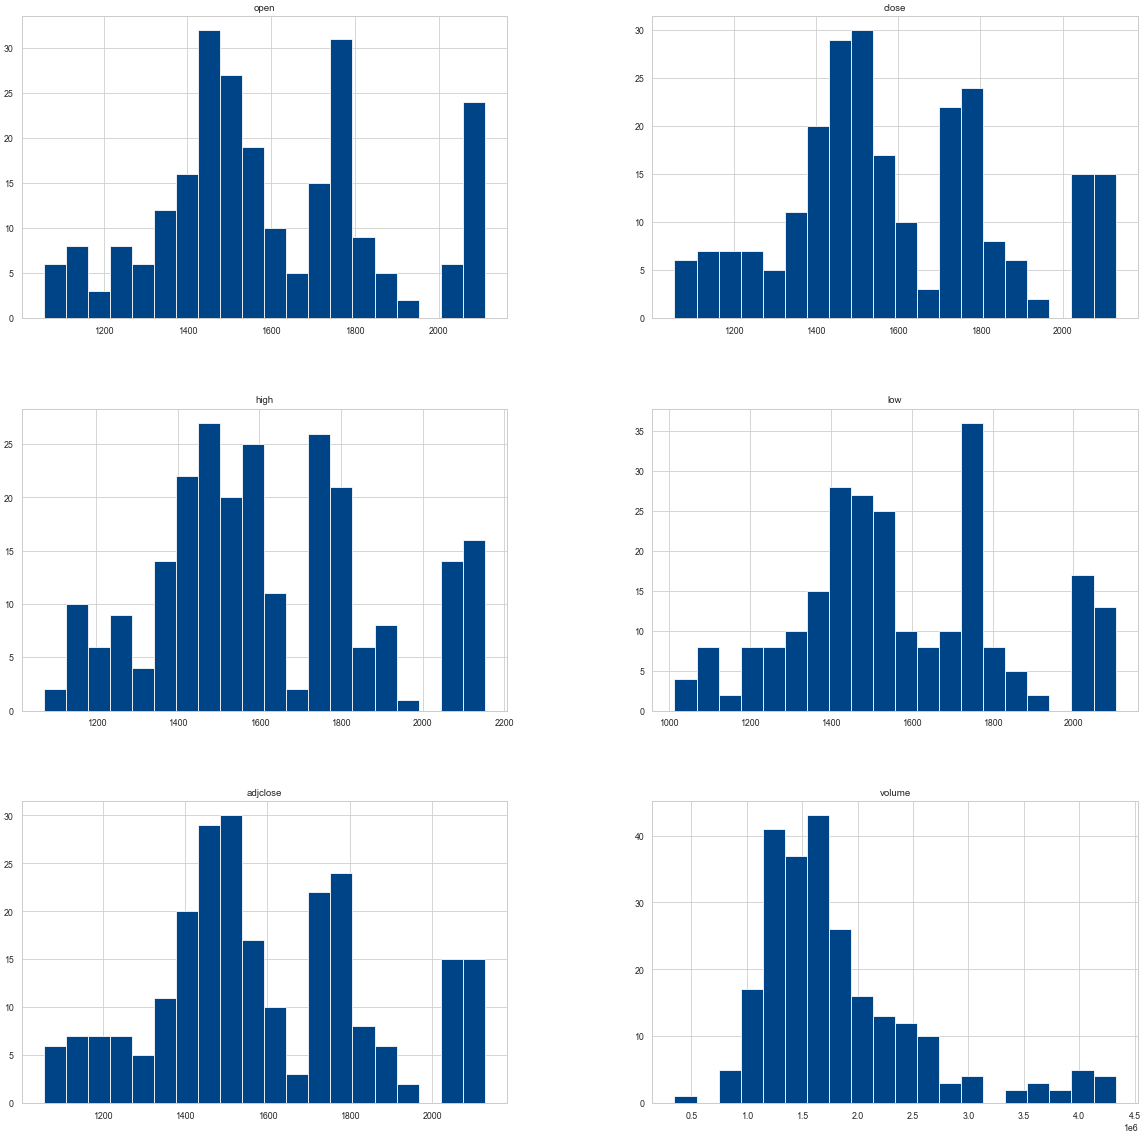

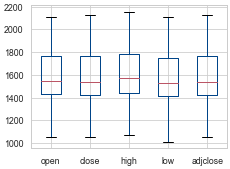

,open,close,high,low,adjclose,volume
count,244.000,244.000,244.000,244.000,244.000,244.000
mean,1594.108,1596.151,1615.884,1575.606,1596.151,1826897.225
std,262.562,263.350,263.938,262.922,263.350,733730.972
min,1056.510,1056.620,1071.000,1013.536,1056.620,346800.000
25%,1429.675,1426.615,1441.750,1409.842,1426.615,1322350.000
50%,1543.225,1538.025,1570.000,1524.690,1538.025,1636800.000
75%,1766.050,1764.620,1782.095,1748.011,1764.620,2062475.000
max,2110.390,2128.310,2152.680,2104.360,2128.310,4329100.000


In [11]:
tck= 'GOOG'
# Set for subplots
fig, ax = plt.subplots(figsize = (20,20))
# Create histogram for all columns
techn_df[techn_df['ticker'] == tck][clmns].hist(ax=ax, bins = 20)
plt.show()
# Create boxplot
techn_df[techn_df['ticker'] == tck][['open', 'close', 'high', 'low', 'adjclose']].boxplot()
plt.show()
# Show summary for all columns
display(techn_df[techn_df['ticker'] == tck].describe().round(3))

##### 4. _NFLX_

<ipython-input-13-a07f110cb5f1>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  techn_df[techn_df['ticker'] == tck][clmns].hist(ax=ax, bins = 20)


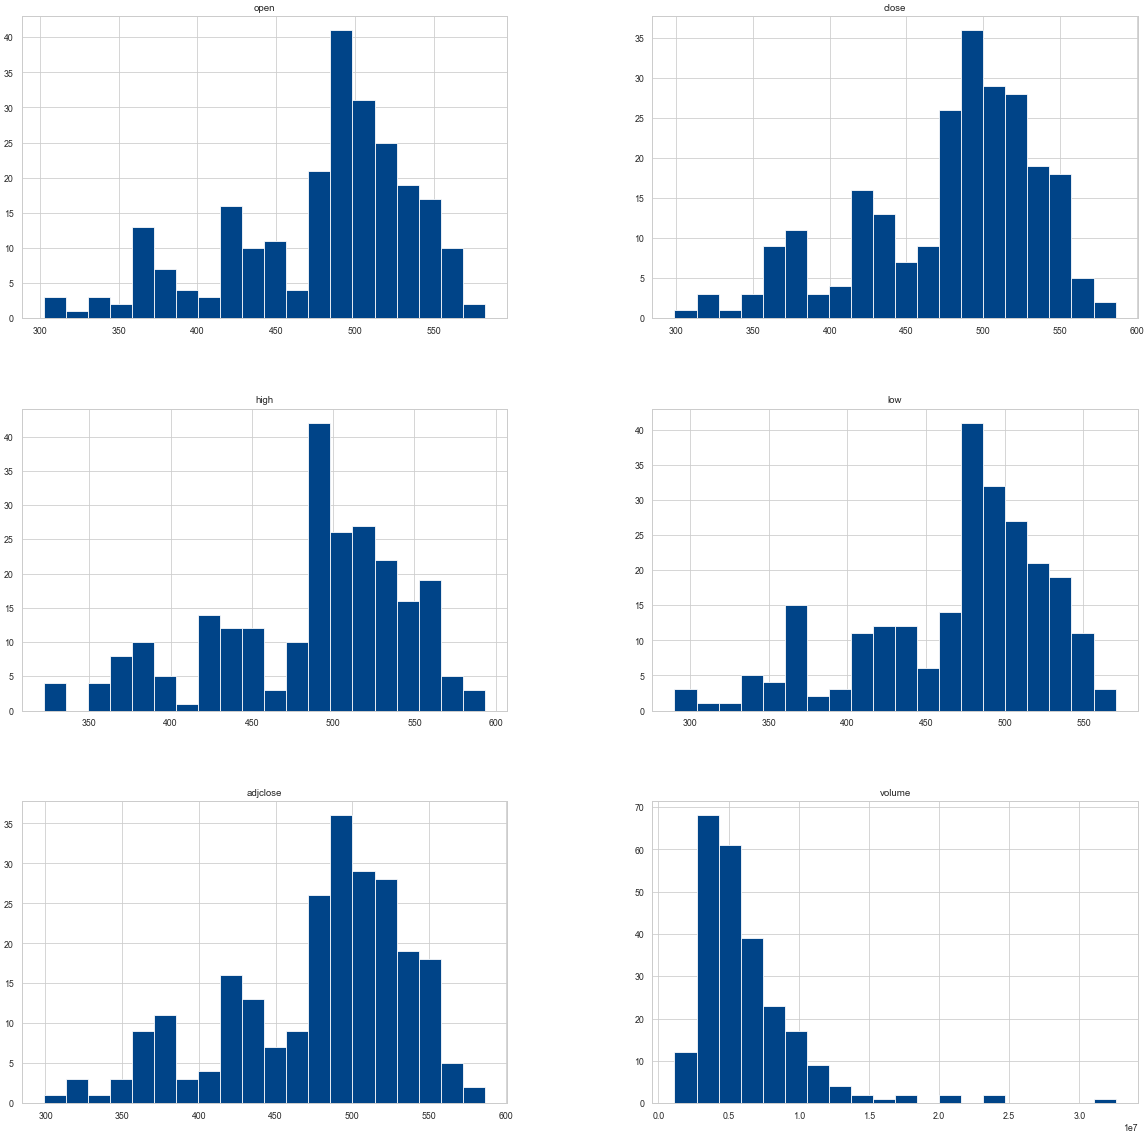

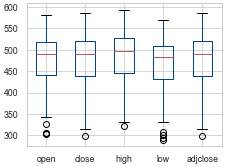

,open,close,high,low,adjclose,volume
count,243.000,243.000,243.000,243.000,243.000,2.430000e+02
mean,478.046,478.270,486.185,469.755,478.270,6.363362e+06
std,59.543,58.909,58.823,58.905,58.909,3.941276e+06
min,302.400,298.840,322.000,290.250,298.840,1.144000e+06
25%,441.910,438.720,447.000,431.485,438.720,3.963000e+06
50%,491.040,490.650,497.000,483.160,490.650,5.402300e+06
75%,517.950,521.610,527.080,508.580,521.610,7.549900e+06
max,582.450,586.340,593.290,570.400,586.340,3.257740e+07


In [13]:
tck= 'NFLX'
# Set for subplots
fig, ax = plt.subplots(figsize = (20,20))
# Create histogram for all columns
techn_df[techn_df['ticker'] == tck][clmns].hist(ax=ax, bins = 20)
plt.show()
# Create boxplot
techn_df[techn_df['ticker'] == tck][['open', 'close', 'high', 'low', 'adjclose']].boxplot()
plt.show()
# Show summary for all columns
display(techn_df[techn_df['ticker'] == tck].describe().round(3))

##### 5. _FB_

<ipython-input-15-f65bc1a1e261>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  techn_df[techn_df['ticker'] == tck][clmns].hist(ax=ax, bins = 20)


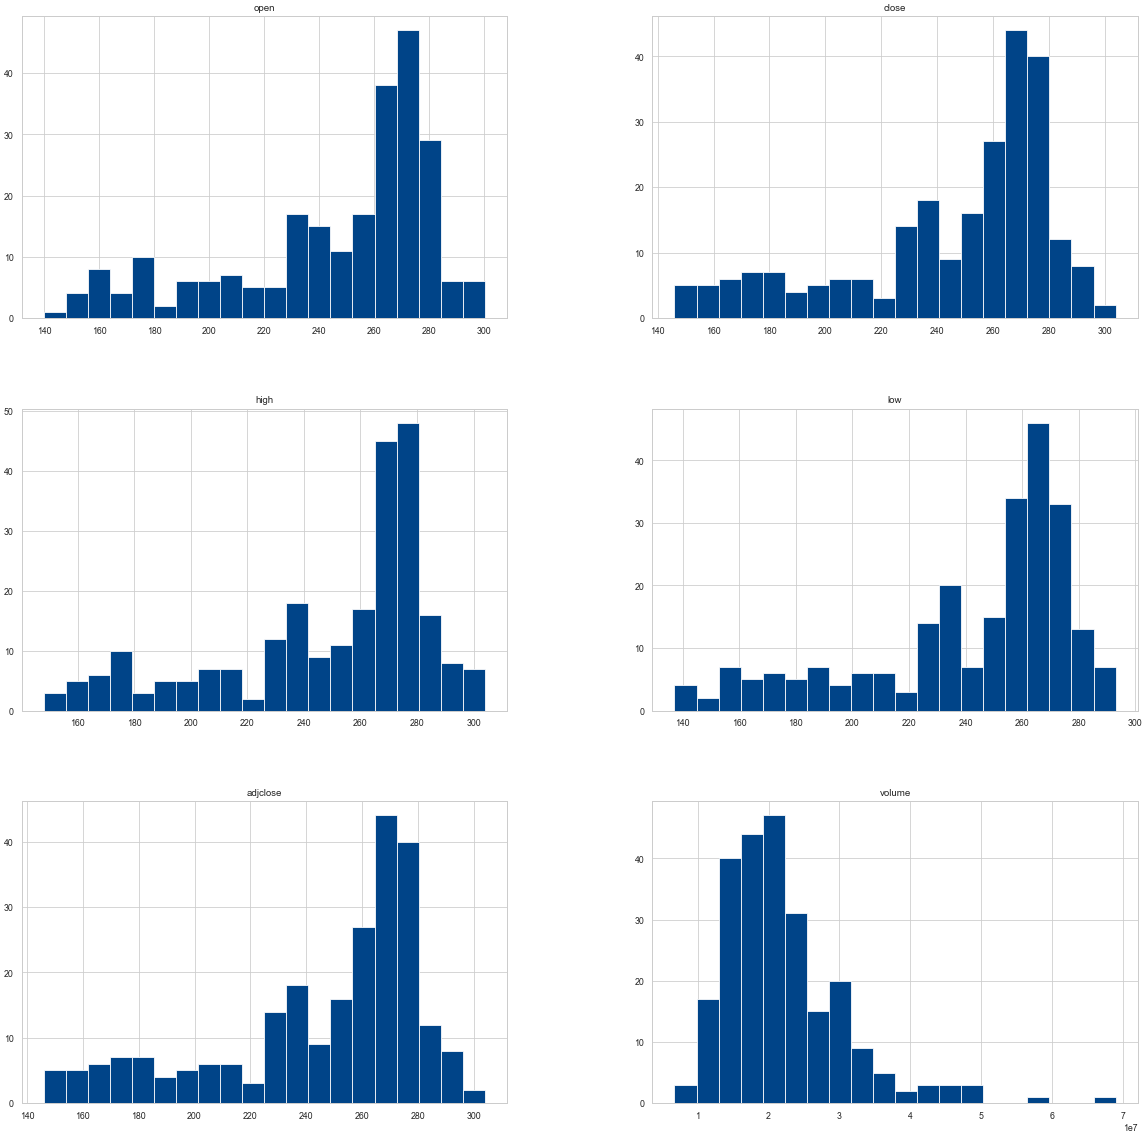

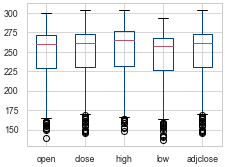

,open,close,high,low,adjclose,volume
count,244.000,244.000,244.000,244.000,244.000,2.440000e+02
mean,245.381,245.445,248.996,241.582,245.445,2.217849e+07
std,37.557,37.637,37.879,37.535,37.637,8.790034e+06
min,139.750,146.010,148.000,137.100,146.010,6.702000e+06
25%,229.438,231.083,232.000,226.120,231.083,1.615075e+07
50%,260.745,261.130,265.000,257.120,261.130,2.060265e+07
75%,272.110,272.423,276.775,268.377,272.423,2.625052e+07
max,300.160,303.910,304.000,293.050,303.910,6.901520e+07


In [15]:
tck= 'FB'
# Set for subplots
fig, ax = plt.subplots(figsize = (20,20))
# Create histogram for all columns
techn_df[techn_df['ticker'] == tck][clmns].hist(ax=ax, bins = 20)
plt.show()
# Create boxplot
techn_df[techn_df['ticker'] == tck][['open', 'close', 'high', 'low', 'adjclose']].boxplot()
plt.show()
# Show summary for all columns
display(techn_df[techn_df['ticker'] == tck].describe().round(3))

We notice no quality issues in the data during our visual inspection

## 2. Inspect missing values

In [16]:
# Help function from preprocessing showing that have missing values with
# The absolute and percentage of their missing values
get_NAN_columns(techn_df)

""
Absolute value
Percentage


We have no missing values

## 3. Inspect Data Quality and outliers

### Check if all trading days from 22/03/2020 until now are available


In [3]:
trading_days = get_trading_days()
# Create list of all dates that we have data from
collected_dates = techn_df.date.dt.date.unique()
# Create list of days that should be collected but are not
diff = list(set(trading_days) - set(collected_dates))

# Show findings
print('Total trading: ', len(trading_days))
print('Total collected days: ', len(collected_dates))
print('Number of missing days: ', len(diff))

# Show all dates that should be included
print('\nList of Missing Days: ')
diff.sort()
for dt in diff:
    print(dt)


Total trading:  260
Total collected days:  244
Number of missing days:  34

List of Missing Days: 
2020-03-27
2020-04-03
2020-04-10
2020-04-17
2020-04-24
2020-05-01
2020-05-08
2020-05-15
2020-05-22
2020-05-25
2020-05-29
2020-06-05
2020-06-12
2020-06-19
2020-06-26
2020-07-03
2020-07-10
2020-07-17
2020-07-24
2020-07-31
2020-08-07
2020-08-14
2020-08-21
2020-08-28
2020-09-04
2020-09-07
2020-09-11
2021-01-01
2021-01-18
2021-02-15
2021-02-19
2021-02-26
2021-03-16
2021-03-23


We notice a large amount of days we should have data but don't
After trying to retrieve this data historically, we find that the data is not available on Yahoo finance for these days

## 3. Calculate Features

Features
    - CCI
    - MACD
    - Larry William's R
    - Momentum
    - Relative Strength Index
    - Stochastic Oscillator
    - Exponential Moving Average
    - On-Balance Volume
    - Bollinger Bands (High and low)
    - ATR
    - Return
    - MA(10)
    - MA(20)
    - LAG(5)
    - LAG(4)
    - LAG(3)
    - LAG(2)
    - LAG(1)

In [preprocessing.py](preprocessing.py) a function is defined that will calculate all technical indicators

!Note this function is designed to calculate indicators given information from a single company
Below the calculation of missing values is for explanatory purposes!

In [4]:
# Function from preprocessing to calculate all technical indicators
tech_table = calculate_technical_indicators(techn_df)
tech_table.head()

,ticker,date,open,close,high,low,adjclose,volume,CCI,MACD,EMA,SMA20,SMA10,STOCHOSC,RSI,WILLR,OBV,RET,BBHB,BBLB,ATR,LAG1,LAG2,LAG3,LAG4,LAG5
0,AAPL,2020-02-19,80.000000,80.904999,81.0,80.000000,80.282684,93984000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93984000,-99.494610,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,TSLA,2020-02-19,184.699997,183.483994,188.0,180.203995,183.483994,127115000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,221099000,126.789440,NaN,NaN,0.0,80.904999,NaN,NaN,NaN,NaN
2,ADBE,2020-02-19,383.829987,383.279999,385.0,381.480011,383.279999,2580400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,223679400,108.890155,NaN,NaN,0.0,183.483994,80.904999,NaN,NaN,NaN
3,PG,2020-02-19,124.849998,125.440002,126.0,124.650002,122.405502,4734000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218945400,-67.271968,NaN,NaN,0.0,383.279999,183.483994,80.904999,NaN,NaN
4,NVDA,2020-02-19,301.489990,314.700012,315.0,301.489990,314.181610,17358300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,236303700,150.876918,NaN,NaN,0.0,125.440002,383.279999,183.483994,80.904999,NaN


Inspect the missing values that we can see at a glance

In [20]:
get_NAN_columns(tech_table)

,CCI,MACD,EMA,SMA20,SMA10,STOCHOSC,RSI,WILLR,BBHB,BBLB,LAG1,LAG2,LAG3,LAG4,LAG5
Absolute value,19.0,25.00,19.0,19.0,9.0,13.0,13.0,13.0,19.0,19.0,1.0,2.0,3.0,4.0,5.0
Percentage,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There are missing values since we need a start period to calculate certain indicators e.g.
20 day moving average needs 20 days prior information to calculate

Therefore we collected 25 days before the starting point of the news data that we have collected
This way we can utilize every day news data we have.
When calculating our dependent and independent period these observations will be cut out of the training data set

In [5]:
# Select columns to show in histograms
clmns = tech_table.columns.drop(['date', 'ticker', 'open', 'close', 'adjclose', 'high', 'low', 'volume'])

def descriptiveTechnicalIndicators(tck):
    # Create subplots to show all histograms in one graph
    fig, ax = plt.subplots(figsize = (20,20))

    # Create histogram
    tech_table[tech_table['ticker'] == tck][clmns].hist(ax=ax, bins = 20, color = 'k')

   # Calculate summary for each column
    display(tech_table[tech_table['ticker'] == tck][clmns].describe().round(3))

In [43]:
# Function that shows heatmap for a dataframe it is given
def create_heatmap(df):
    # Only investigate indicator columns and volume
    clmns = df.columns.drop(['date', 'ticker', 'open', 'close', 'adjclose', 'high', 'low'])

    # Calculate correlation matrix
    corr_df = df[clmns].corr()

    # set heatmap size
    plt.figure(figsize= (10,10))

    # Settings heatmap seaborn
    cbar_kws = {"shrink":.8,
               'extend':'max',
               'extendfrac':.2,
               "drawedges":True}

    # Increase label font size
    sns.set(font_scale=2)

    # Create Heatmap
    sns.heatmap(corr_df, cmap = 'inferno', linewidth = 2, cbar_kws=cbar_kws)

    # Show Heatmap
    plt.show()

    # Reset font size to standard value
    sns.set(font_scale=1)

In [31]:
def corr_plot(tech_table):
    # Calculate label: Up or down: 1 or 0
    tech_table = tech_table.sort_values(by='date').reset_index(drop = True)
    tech_table['label'] = np.where(tech_table['close'].shift(-1) <= tech_table['close'], 0, 1)
    tech_table['Previous Movement (1 day)'] = tech_table['label'].shift(1)
    tech_table['Previous Movement (2 day)']= tech_table['label'].shift(2)
    buy_Corr = tech_table.corr()["label"]
    buy_Corr= buy_Corr[np.argsort(buy_Corr, axis = 0)[::-1]] #sort in descending order
    buy_Corr = buy_Corr[1:27] # remove the 'label'

    # Plot the top correlation in a bar chart
    width = 0
    fig, ax = plt.subplots(figsize = (10,6))
    rects = ax.barh(np.arange(len(buy_Corr)), np.array(buy_Corr.values), color = 'k')
    ax.set_yticks(np.arange(len(buy_Corr)) + ((width)/1))
    ax.set_yticklabels(buy_Corr.index, rotation ='horizontal')
    ax.set_xlabel("Correlation coefficient")
    ax.set_title("{} - Correlation Coefficients w.r.t buy/sell".format(tck),fontsize = 14)
    ax.grid(True)

##### 1. _AAPL_

<ipython-input-5-13be7e4a178d>:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  tech_table[tech_table['ticker'] == tck][clmns].hist(ax=ax, bins = 20, color = 'k')


,CCI,MACD,EMA,SMA20,SMA10,STOCHOSC,RSI,WILLR,OBV,RET,BBHB,BBLB,ATR,LAG1,LAG2,LAG3,LAG4,LAG5
count,225.000,219.000,225.000,225.000,235.000,231.000,231.000,231.000,2.440000e+02,244.000,225.000,225.000,244.000,243.000,242.000,241.000,240.000,239.000
mean,50.111,1.806,106.318,106.303,105.854,63.265,56.825,-36.735,2.583760e+08,0.120,115.353,97.253,3.094,105.524,105.464,105.402,105.321,105.243
std,100.843,2.487,22.253,22.758,23.249,31.751,12.241,31.751,1.182879e+09,3.296,23.496,22.556,1.141,23.562,23.592,23.621,23.637,23.656
min,-223.119,-3.773,65.070,63.403,61.151,0.303,28.053,-99.697,-2.546230e+09,-23.384,70.601,53.749,0.000,56.092,56.092,56.092,56.092,56.092
25%,-21.094,0.322,86.750,86.456,84.946,36.196,49.003,-63.804,-5.288381e+08,-1.213,94.636,78.275,2.237,82.322,81.801,81.280,81.186,81.092
50%,71.815,1.851,115.264,115.883,114.784,75.207,55.716,-24.793,8.536726e+08,0.059,123.196,105.651,3.317,114.970,114.965,114.960,114.955,114.950
75%,118.904,3.331,123.913,123.248,123.033,91.767,66.392,-8.233,1.237668e+09,1.742,134.102,114.540,3.966,123.495,123.622,123.750,123.367,123.160
max,377.759,8.678,135.036,136.261,137.672,108.545,82.276,8.545,1.652186e+09,13.252,144.351,129.537,4.941,143.160,143.160,143.160,143.160,143.160


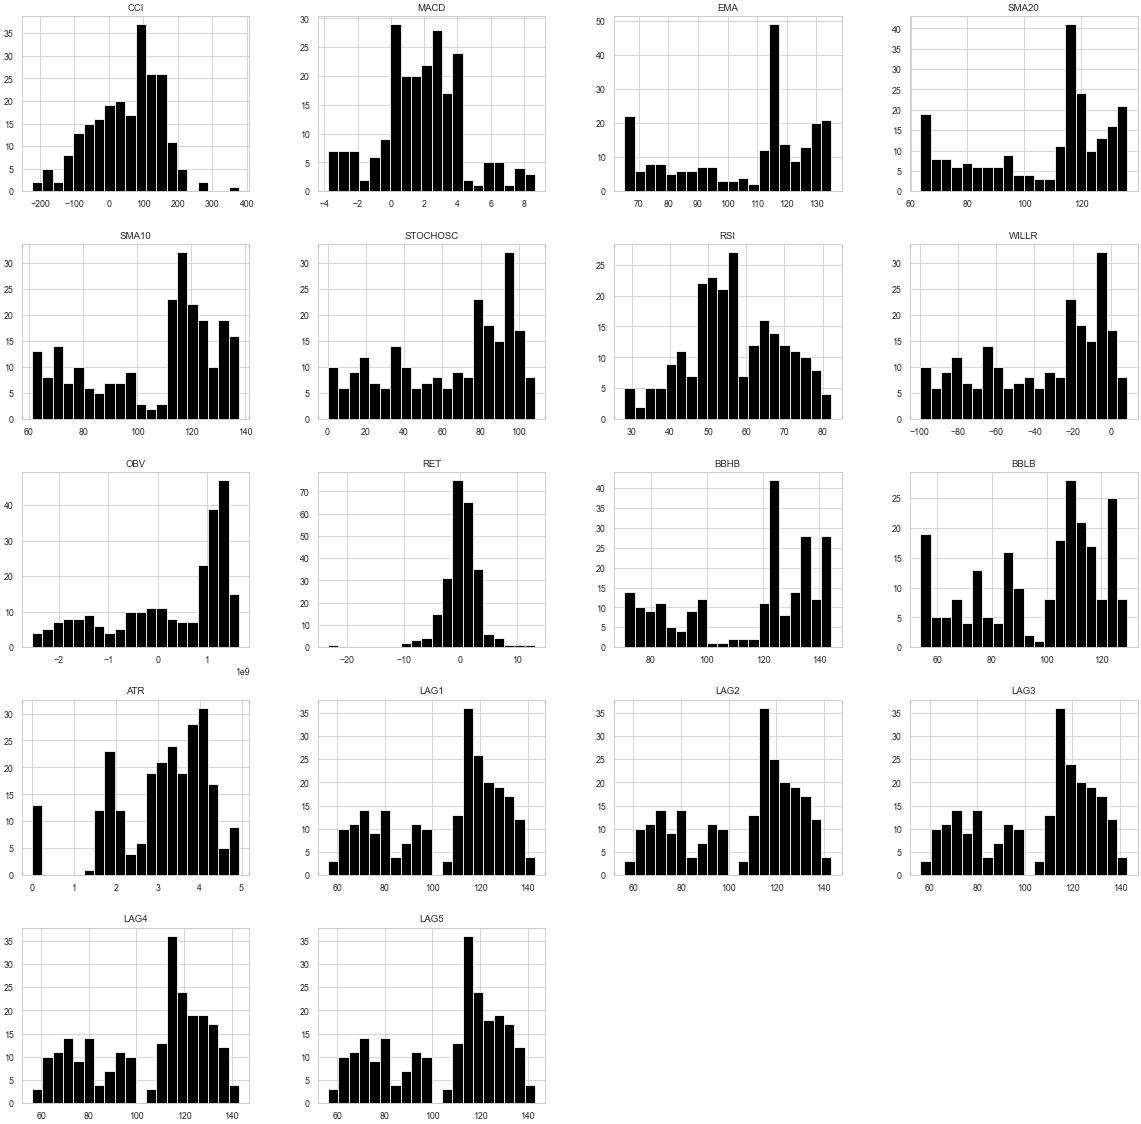

In [6]:
tck = 'AAPL'
tech_table = calculate_technical_indicators(techn_df[techn_df['ticker'] == tck])
descriptiveTechnicalIndicators(tck)

We notice some extreme values for our lagged variables.
In theorie this distribution should be identical to the distribution of closing price
since we shifted this column one place upwards

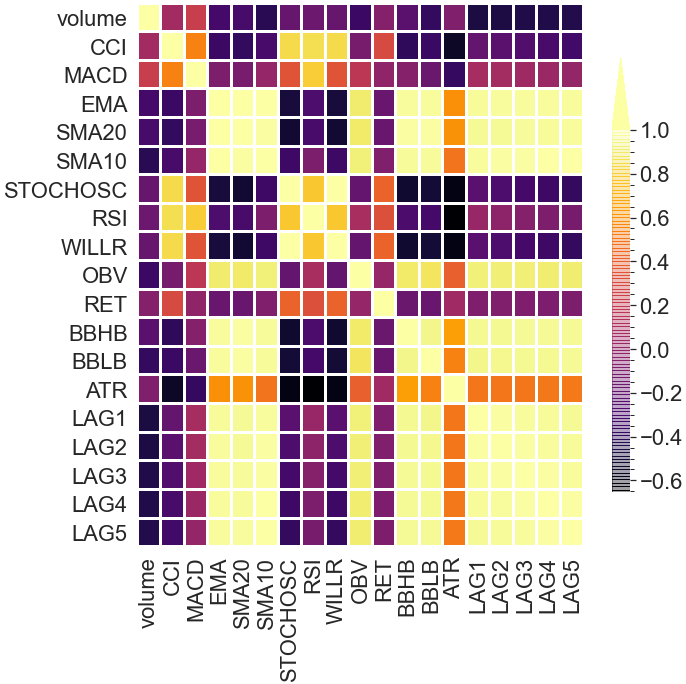

In [45]:
# Create Heatmap for Apple indicators
create_heatmap(tech_table[tech_table['ticker'] == tck])

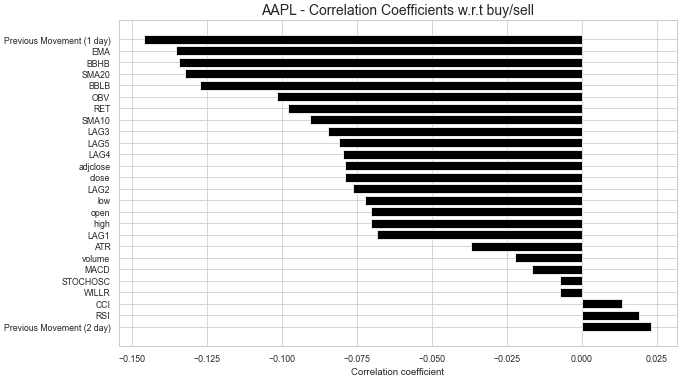

In [33]:
corr_plot(tech_table)

##### 2. _AMZN_

<ipython-input-5-13be7e4a178d>:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  tech_table[tech_table['ticker'] == tck][clmns].hist(ax=ax, bins = 20, color = 'k')


,CCI,MACD,EMA,SMA20,SMA10,STOCHOSC,RSI,WILLR,OBV,RET,BBHB,BBLB,ATR,LAG1,LAG2,LAG3,LAG4,LAG5
count,225.000,219.000,225.000,225.000,235.000,231.000,231.000,231.000,2.440000e+02,244.000,225.000,225.000,244.000,243.000,242.000,241.000,240.000,239.000
mean,38.339,37.966,2925.145,2924.332,2905.018,58.219,54.901,-41.781,1.054437e+08,0.076,3126.636,2722.029,84.546,2891.492,2890.734,2890.164,2889.141,2888.335
std,100.028,57.274,416.660,429.806,453.366,28.674,10.236,28.674,4.672864e+07,2.941,420.355,455.638,25.560,468.257,469.078,469.970,470.683,471.505
min,-207.486,-70.160,1908.700,1875.785,1818.984,0.316,24.717,-99.684,-3.465460e+07,-24.968,2040.846,1638.002,0.000,1676.610,1676.610,1676.610,1676.610,1676.610
25%,-30.587,-7.399,2639.943,2619.095,2566.145,37.313,47.562,-62.687,8.632338e+07,-1.086,2866.505,2371.685,72.488,2511.000,2504.470,2497.940,2493.055,2488.170
50%,45.656,23.308,3150.142,3148.728,3125.689,61.990,54.365,-38.010,1.275058e+08,0.250,3300.161,2950.078,85.542,3105.460,3107.870,3110.280,3107.870,3110.280
75%,108.251,90.134,3200.565,3206.826,3208.866,84.284,62.255,-15.716,1.355807e+08,1.531,3412.479,3055.294,102.680,3203.965,3204.182,3204.400,3204.557,3204.715
max,246.520,167.923,3297.631,3298.724,3390.318,99.890,78.821,-0.110,1.535253e+08,7.027,3593.702,3215.532,122.169,3531.450,3531.450,3531.450,3531.450,3531.450


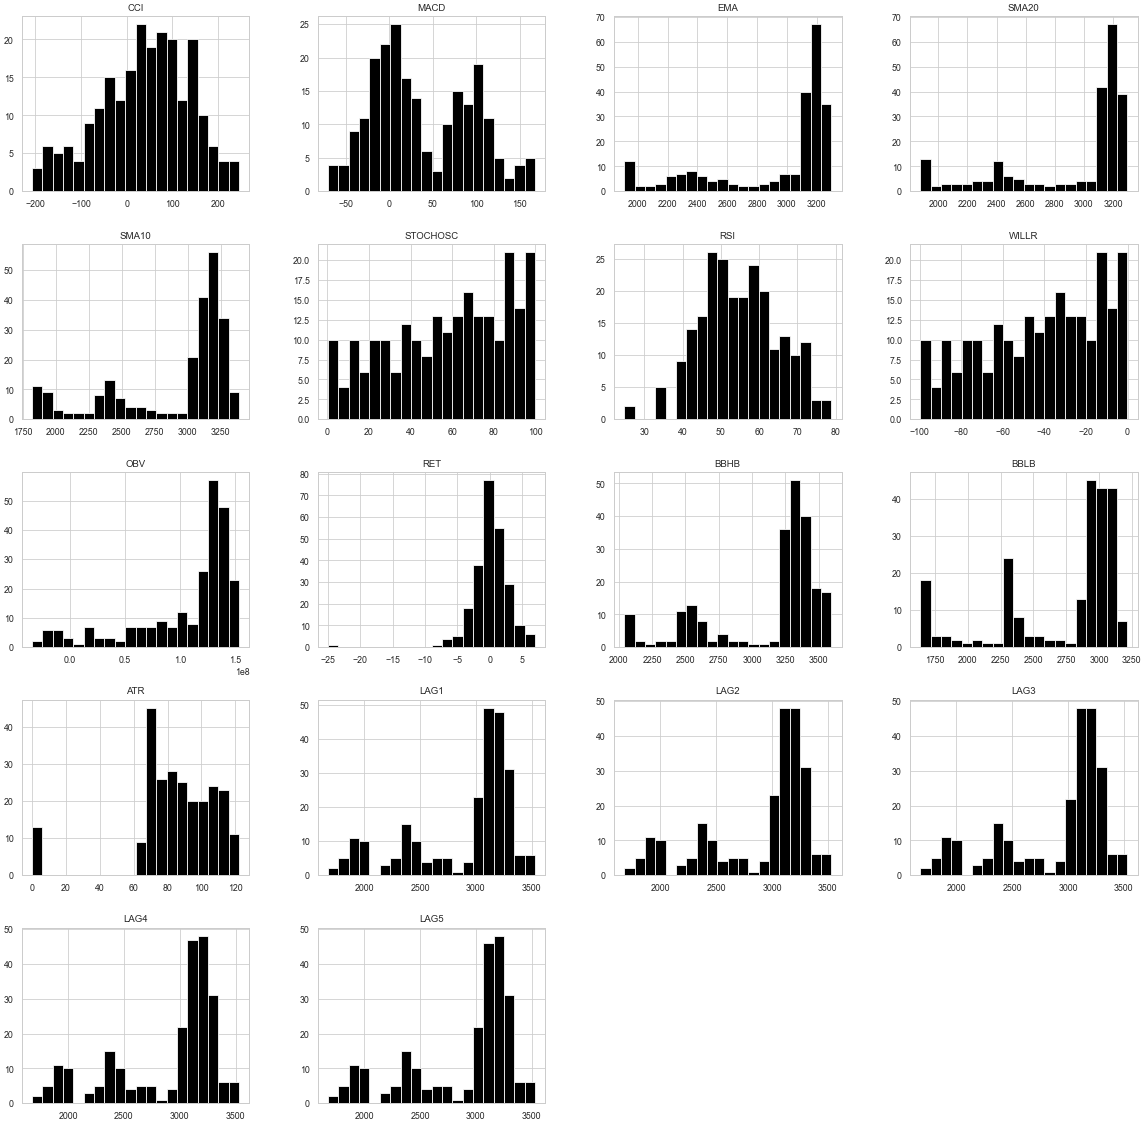

In [7]:
tck = 'AMZN'
tech_table = calculate_technical_indicators(techn_df[techn_df['ticker'] == tck])
descriptiveTechnicalIndicators(tck)

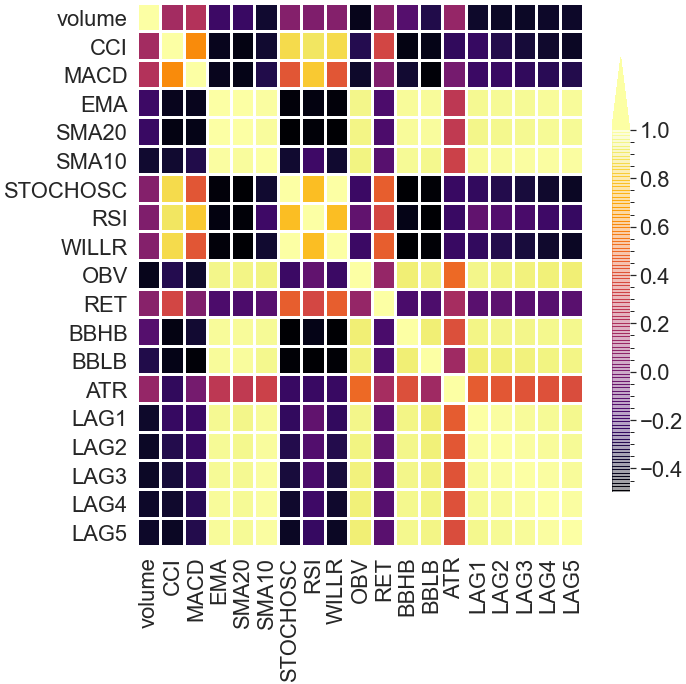

In [47]:
# Create Heatmap for Apple indicators
create_heatmap(tech_table[tech_table['ticker'] == tck])

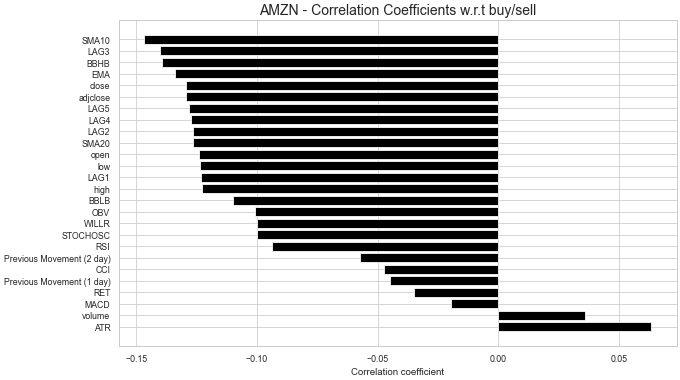

In [35]:
corr_plot(tech_table)

##### 3. _GOOG_

<ipython-input-5-13be7e4a178d>:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  tech_table[tech_table['ticker'] == tck][clmns].hist(ax=ax, bins = 20, color = 'k')


,CCI,MACD,EMA,SMA20,SMA10,STOCHOSC,RSI,WILLR,OBV,RET,BBHB,BBLB,ATR,LAG1,LAG2,LAG3,LAG4,LAG5
count,225.000,219.000,225.000,225.000,235.000,231.000,231.000,231.000,2.440000e+02,244.000,225.000,225.000,244.000,243.000,242.000,241.000,240.000,239.000
mean,53.026,23.444,1589.249,1586.738,1590.377,61.726,56.245,-38.274,1.564004e+07,0.130,1695.023,1478.454,43.498,1594.331,1592.476,1590.635,1588.549,1586.550
std,98.682,28.097,236.632,243.262,255.822,29.258,10.568,29.258,2.091483e+07,2.420,247.288,251.119,13.909,262.350,261.292,260.258,258.777,257.455
min,-235.080,-77.950,1190.602,1148.847,1109.030,0.385,22.231,-99.615,-2.748380e+07,-8.269,1260.926,969.070,0.000,1056.620,1056.620,1056.620,1056.620,1056.620
25%,-32.259,7.692,1424.679,1434.731,1435.121,37.580,48.936,-62.420,-3.199250e+06,-1.047,1486.935,1378.057,37.439,1424.940,1423.265,1421.590,1421.155,1420.720
50%,71.081,27.083,1543.065,1539.748,1532.396,70.702,57.686,-29.298,1.585485e+07,0.289,1664.543,1442.279,41.894,1534.610,1533.500,1532.390,1532.205,1532.020
75%,123.546,39.475,1757.783,1769.721,1760.670,87.925,63.868,-12.075,3.494205e+07,1.391,1839.963,1694.364,52.195,1763.645,1763.277,1763.000,1763.000,1762.375
max,324.398,85.843,2058.061,2083.767,2100.381,99.683,77.121,-0.317,4.908883e+07,8.739,2232.072,2029.256,70.770,2128.310,2128.310,2128.310,2128.310,2128.310


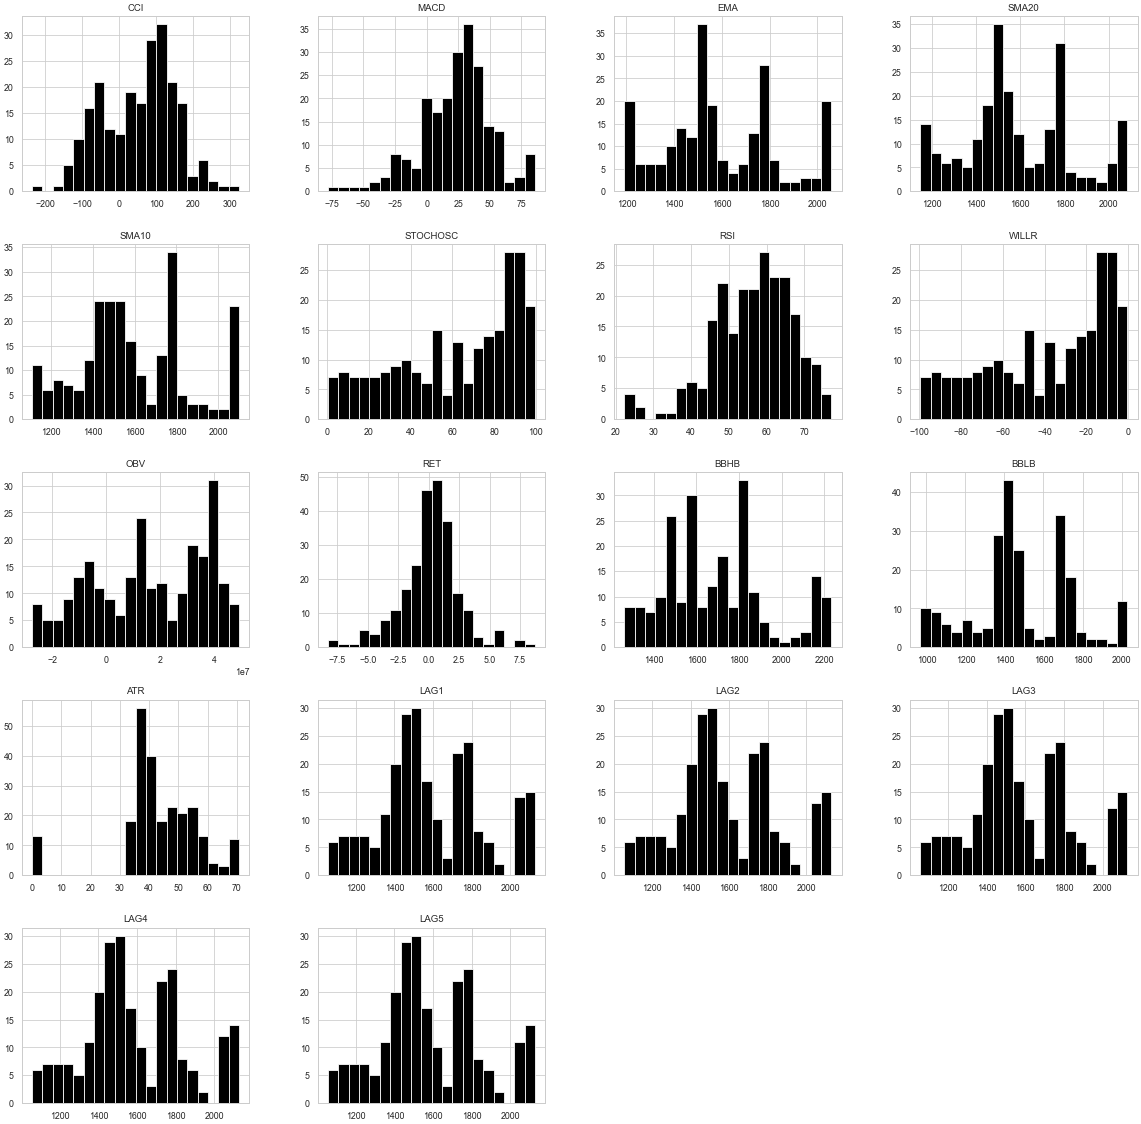

In [8]:
tck = 'GOOG'
tech_table = calculate_technical_indicators(techn_df[techn_df['ticker'] == tck])
descriptiveTechnicalIndicators(tck)


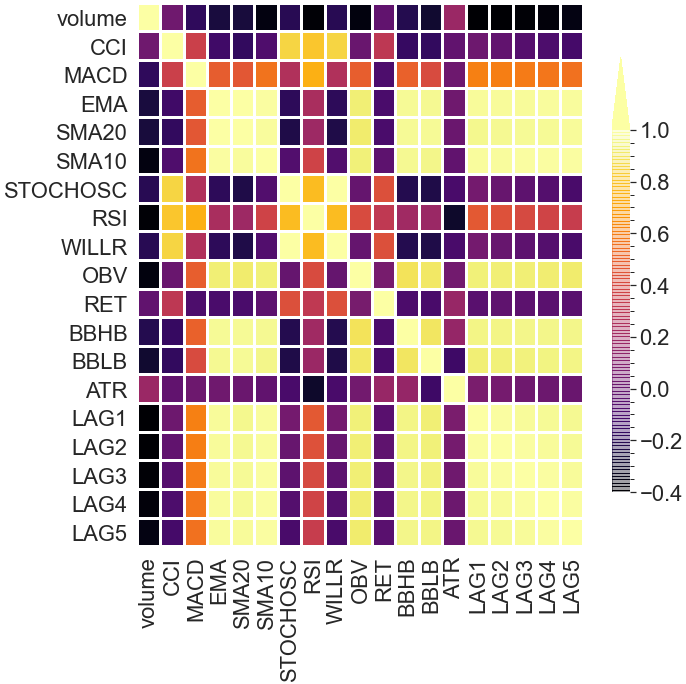

In [49]:
# Create Heatmap for Apple indicators
create_heatmap(tech_table[tech_table['ticker'] == tck])

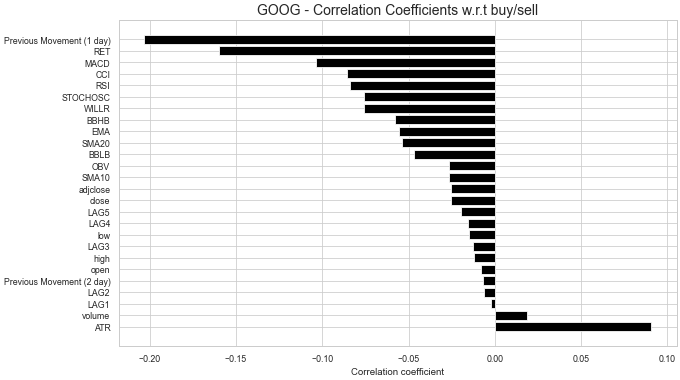

In [37]:
corr_plot(tech_table)

##### 4. _NFLX_

<ipython-input-5-13be7e4a178d>:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  tech_table[tech_table['ticker'] == tck][clmns].hist(ax=ax, bins = 20, color = 'k')


,CCI,MACD,EMA,SMA20,SMA10,STOCHOSC,RSI,WILLR,OBV,RET,BBHB,BBLB,ATR,LAG1,LAG2,LAG3,LAG4,LAG5
count,224.000,218.000,224.000,224.000,234.000,230.000,230.000,230.000,2.430000e+02,243.000,224.000,224.000,243.000,242.000,241.000,240.000,239.000,238.000
mean,24.638,5.443,481.376,481.316,479.487,54.227,53.427,-45.773,1.087225e+07,0.092,520.607,442.024,17.197,478.084,477.943,477.831,477.636,477.457
std,99.715,7.661,50.142,51.944,55.737,28.704,8.580,28.704,2.178688e+07,3.309,51.107,56.035,4.851,58.960,59.041,59.139,59.186,59.245
min,-268.116,-8.805,351.448,352.017,335.503,0.678,25.667,-99.322,-5.030890e+07,-19.253,398.286,297.069,0.000,298.840,298.840,298.840,298.840,298.840
25%,-57.599,-0.380,446.600,440.268,439.338,30.470,47.493,-69.530,-3.813150e+06,-1.459,478.926,407.575,15.266,438.495,438.270,438.075,437.880,437.685
50%,28.296,5.892,494.787,496.833,492.340,56.821,52.897,-43.179,1.606160e+07,0.090,536.565,460.059,18.116,490.615,490.580,490.340,490.100,489.960
75%,95.313,10.400,514.447,516.505,518.820,79.860,59.756,-20.140,2.745250e+07,1.881,558.193,471.608,20.094,520.775,520.800,521.205,520.750,520.775
max,311.878,24.271,547.126,553.343,554.409,100.065,73.792,0.065,5.550105e+07,16.854,592.730,533.190,24.977,586.340,586.340,586.340,586.340,586.340


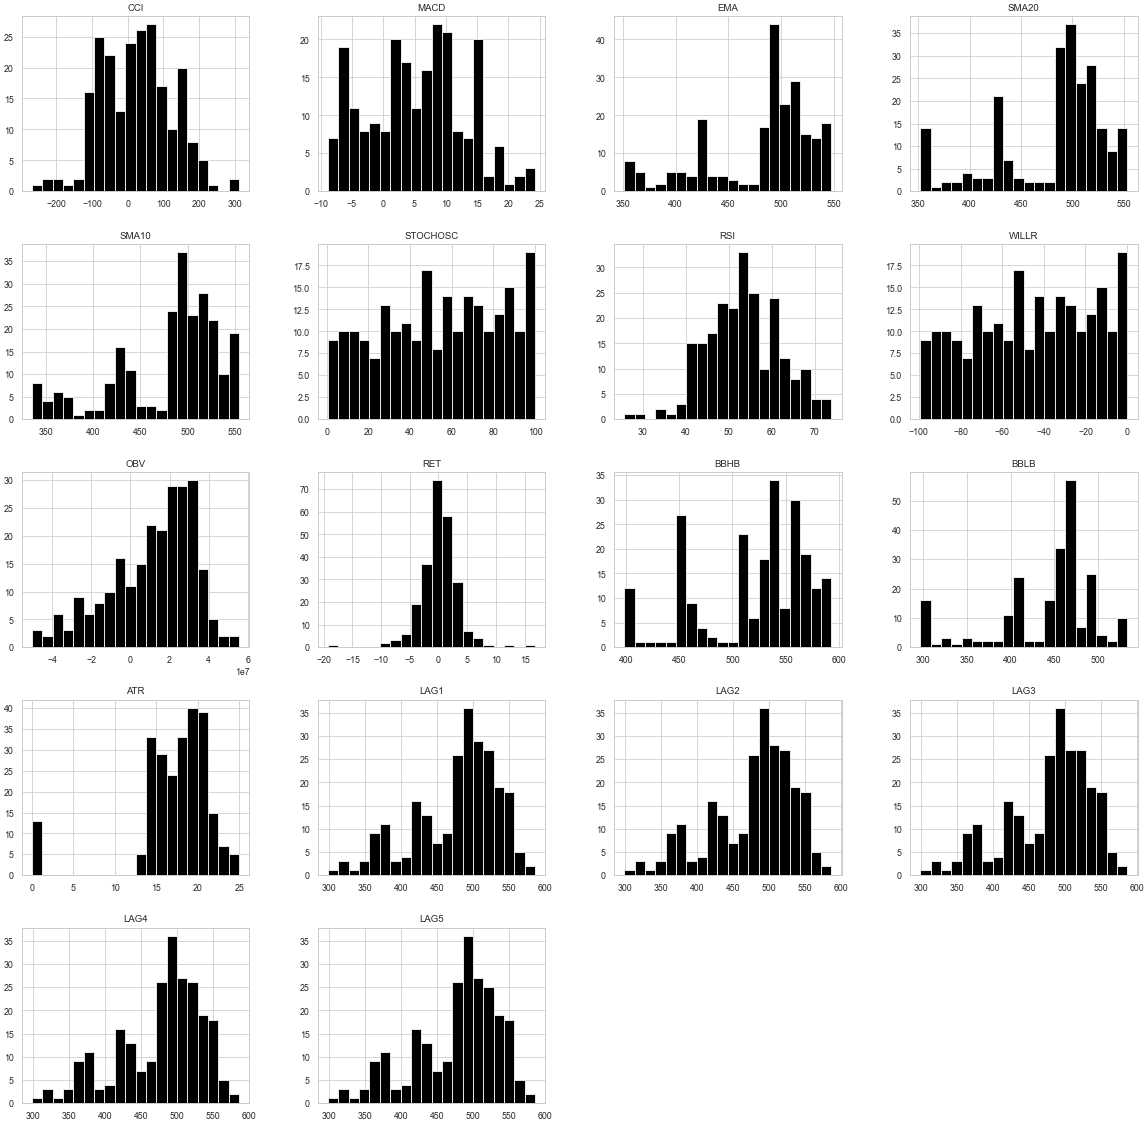

In [9]:
tck = 'NFLX'
tech_table = calculate_technical_indicators(techn_df[techn_df['ticker'] == tck])
descriptiveTechnicalIndicators(tck)

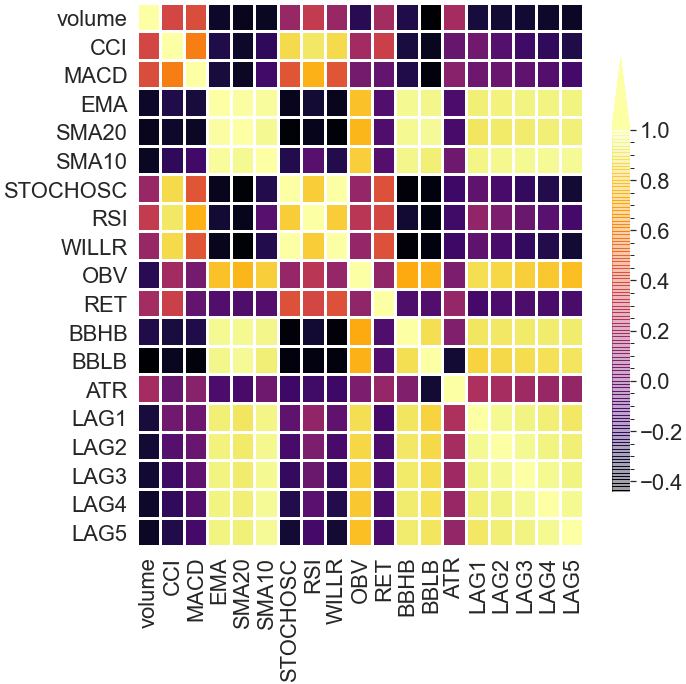

In [51]:
# Create Heatmap for Apple indicators
create_heatmap(tech_table[tech_table['ticker'] == tck])

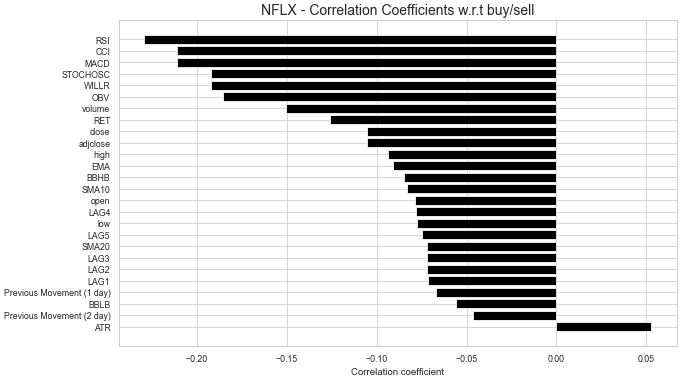

In [39]:
corr_plot(tech_table)

##### 5. _FB_

<ipython-input-5-13be7e4a178d>:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  tech_table[tech_table['ticker'] == tck][clmns].hist(ax=ax, bins = 20, color = 'k')


,CCI,MACD,EMA,SMA20,SMA10,STOCHOSC,RSI,WILLR,OBV,RET,BBHB,BBLB,ATR,LAG1,LAG2,LAG3,LAG4,LAG5
count,225.000,219.000,225.000,225.000,235.000,231.000,231.000,231.000,2.440000e+02,244.000,225.000,225.000,244.000,243.000,242.000,241.000,240.000,239.000
mean,31.814,2.717,246.958,246.600,245.554,57.858,53.434,-42.142,3.995766e+08,0.115,265.652,227.549,8.060,245.247,245.062,244.922,244.760,244.638
std,99.239,4.978,33.917,35.282,36.685,28.666,10.951,28.666,2.417055e+08,2.885,33.390,38.866,2.158,37.588,37.554,37.570,37.563,37.594
min,-243.188,-10.545,167.708,161.377,154.117,0.204,18.408,-99.796,-1.634474e+08,-11.390,180.862,131.871,0.000,146.010,146.010,146.010,146.010,146.010
25%,-38.984,-0.917,230.180,233.064,232.569,36.632,47.177,-63.368,2.946368e+08,-1.532,244.842,222.240,7.713,230.775,230.468,230.160,230.150,230.140
50%,40.236,1.810,264.554,264.913,261.576,58.610,52.276,-41.390,5.153936e+08,0.232,279.607,245.048,8.194,261.100,260.715,260.330,260.135,259.940
75%,107.192,5.715,271.039,272.061,272.543,83.683,60.745,-16.317,5.672262e+08,1.825,287.829,255.003,8.945,272.280,272.098,271.970,271.895,271.870
max,234.045,14.948,279.041,278.677,287.648,100.609,82.218,0.609,6.717315e+08,8.697,308.917,268.348,11.547,303.910,303.910,303.910,303.910,303.910


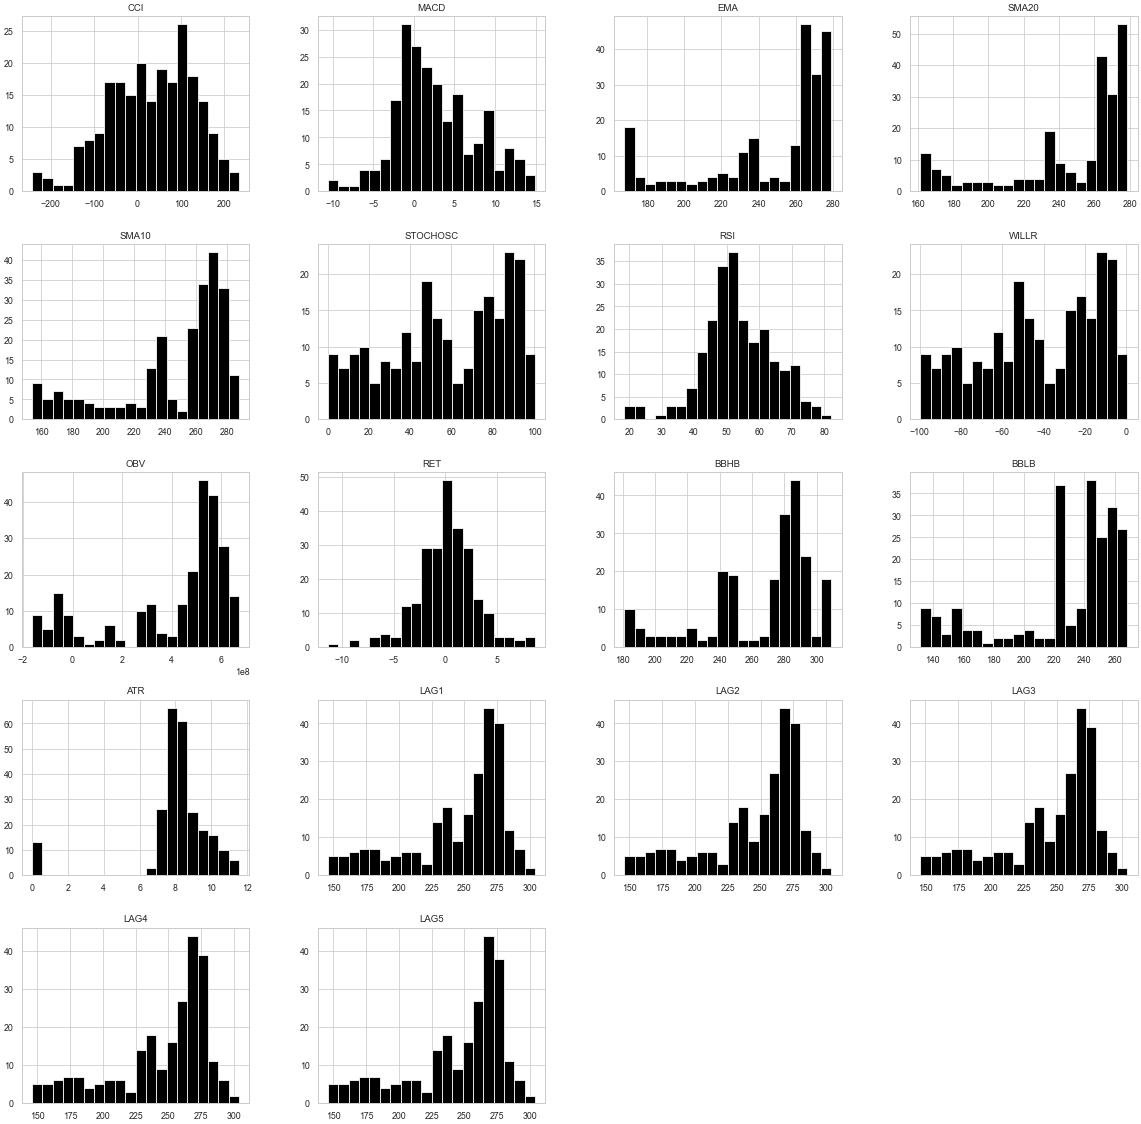

In [10]:
tck = 'FB'
tech_table = calculate_technical_indicators(techn_df[techn_df['ticker'] == tck])
descriptiveTechnicalIndicators(tck)

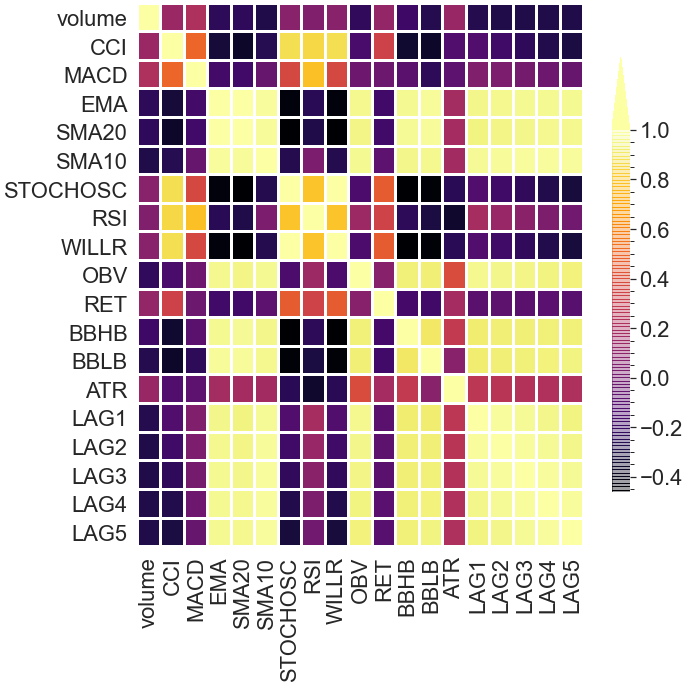

In [53]:
# Create Heatmap for Apple indicators
create_heatmap(tech_table[tech_table['ticker'] == tck])

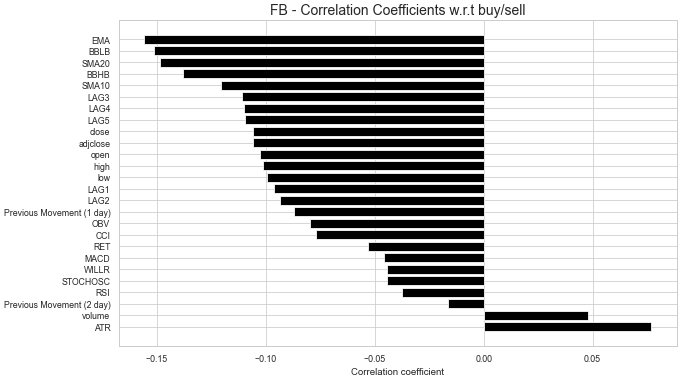

In [41]:
corr_plot(tech_table)

- As could be expected we find high correlation between the lagged features
Additionally EMA, SMA10 and SMA20 are also highly correlated with each other and the lagged variables
We also find Bollinger bands (upper and lower band) are correlated with price and with ATR which could be expected
because ATR is also a form of indicators

- Additionnaly, we find that the correlation differs for each stock.
    For some stock certain indicators are highly correlated and other they are not

Not included in this notebook but the next preprocessing step executed is applying a scaling step where
we normalize the features